# Set up your notebook

In [169]:
# import libraries
# set up plot configurations (if required)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, auc, confusion_matrix, recall_score, precision_score
%matplotlib inline

# Executive Summary

- Come back to this after your analysis has been completed.

In this project, we investigated the association between an adult passenger's gender and the passenger's survival rate in the Titanic incident. 
We used a dataset with around 600 observations (after clean-up and filtering) and a logistic regression model to test the hypothesis that adult female passengers had a significantly higher survival rate than adult male passengers in the incident. 
The result of the model fitting and prediction shows that the logistic regression model is fairly robust in predicting a passenger's survival rate based on the passenger's gender, and that adult female passenger did have a significantly higher survival rate than adult male passenger in the incident. This partially proves that the widely acknowledged code of conduct on saving the lives of women and children first in a life-threatening situation was upheld in this incident.
Some risks of our analysis include the presence of a few potential confounding variables that might reduce the validity of the association between gender and survival rate in this incident. In our study, we assumed that such potential confounding variables do not affect the association between gender and survival rate. We also assumed that the sample in the dataset is representative of the entire population in the Titanic incident so that our finding and conclusion on the dataset can be applied to the entire population in the Titanic incident.

# Problem Statement

## What are you trying to find out?

- Write a well-formed problem statement, with reference to the SMART guideline. Remember that not all of the letters may apply in all cases, it is just a guideline you can follow.

Did adult female passengers (aged 18 or above) have a significantly higher survival rate than adult male passengers in the Titanic incident? (This is to partially test if the widely acknowledged code of conduct whereby the lives of women and children were to be saved first in a life-threatening situation when survival resources were limited was upheld in this incident.)

## What is your dataset about?

- Describe the dataset in words (you could write a short paragraph, describe the columns, create a data dictionary, etc. but do not include descriptive statistics here)

The dataset contains personal particulars data, ticket data and other miscellaneous data of passengers on the Titanic. The personal particulars data include name, sex and age. The ticket data include ticket number, fare and cabin number. Other miscellaneous data include if the passenger survived, passenger class and number of siblings and spouse on board, etc.

## Risks and Assumptions

Some risks include the presence of a few potential confounding variables in the analysis such as a passenger's age, a passenger's passenger class and a passenger's cabin location which might reduce the validity of the association between gender and survival rate in the Titanic incident. Some assumptions include that the sample in the dataset is representative of the entire population in the Titanic incident (the actual number of people on board was more than 2200 but we only have less than 900 people in the sample data), and that the potential confounding variables described above do not affect the assocation between gender and survival rate in the Titanic incident.

## Hypothesis

Null hypothesis, $H_0$: There is no assocation between a passenger's gender and his/her survival rate among the adult population in the Titanic incident.

Alternative hypothesis, $H_1$: There is a significantly higher survival rate for female passengers than male passengers among the adult population in the Titanic incident.

## Success Metrics

- __This is something you might consider for your final project. However, we will skip this for Project 4.__

# Exploratory Data Analysis

- Include visualizations, descriptive statistics, etc.

In [170]:
titanic_raw = pd.read_csv("../assets/titanic.csv")
titanic_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [171]:
#In the 'Sex' column, replace 'male' with 1 and 'female' with 0 so that we can view its summary statistics
titanic_raw1=titanic_raw.replace('male',1)
titanic_raw2=titanic_raw1.replace('female',0)
titanic_raw2.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [172]:
titanic_raw2.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


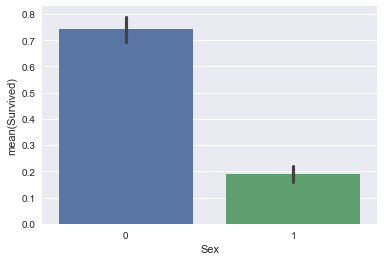

In [173]:
sns.barplot("Sex", "Survived", data=titanic_raw2) #female is 0 and male is 1 for the variable 'Sex'
plt.show()

(0, 150)

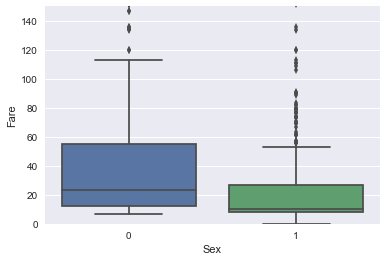

In [174]:
sns.boxplot("Sex", "Fare", data=titanic_raw2)  #female is 0 and male is 1 for the variable 'Sex'
plt.ylim(0,150)

(0, 150)

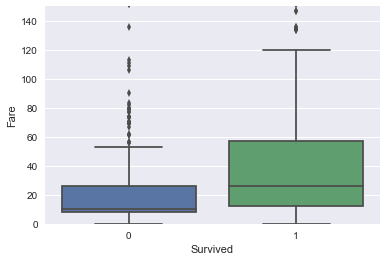

In [175]:
sns.boxplot("Survived", "Fare", data=titanic_raw2)
plt.ylim(0,150)

(0, 85)

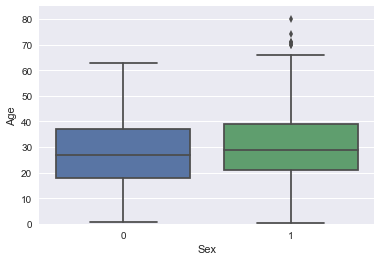

In [176]:
sns.boxplot("Sex", "Age", data=titanic_raw2)  #female is 0 and male is 1 for the variable 'Sex'
plt.ylim(0,85)

(0, 85)

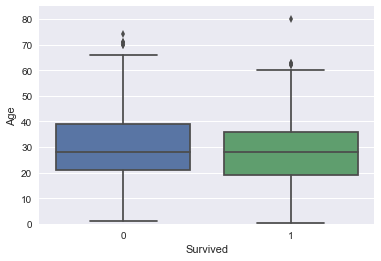

In [177]:
sns.boxplot("Survived", "Age", data=titanic_raw2)
plt.ylim(0,85)

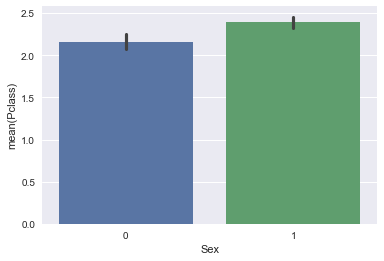

In [178]:
sns.barplot("Sex", "Pclass", data=titanic_raw2) #female is 0 and male is 1 for the variable 'Sex'
plt.show()

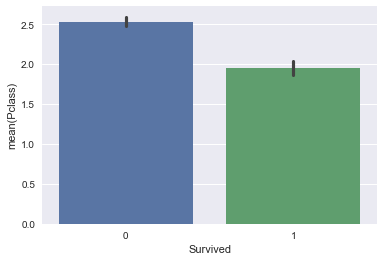

In [179]:
sns.barplot("Survived", "Pclass", data=titanic_raw2) 
plt.show()

# Data Cleaning

- Prepare your dataset for modeling

In [180]:
#drop column 'Cabin' and then drop rows with NA values
titanic_cleanV1=titanic_raw2.drop('Cabin',1)
titanic_V1 = titanic_cleanV1.dropna()
titanic_V1.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,0.636236,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


In [181]:
#Get the subset of data with people's age larger than or equal to 18 (to get the adult population)
titanic_AgeAbove18_V1=titanic_V1.drop(titanic_V1[titanic_V1['Age'] < 18].index)
titanic_AgeAbove18_V1.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,452.245409,0.378965,2.175292,0.659432,33.528381,0.335559,0.315526,35.198552
std,254.185811,0.485535,0.848562,0.474296,12.149158,0.577668,0.813109,55.957703
min,1.000000,0.000000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,234.000000,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,7.987500
50%,451.000000,0.000000,2.000000,1.000000,31.000000,0.000000,0.000000,13.791700
75%,671.500000,1.000000,3.000000,1.000000,40.000000,1.000000,0.000000,32.410400
max,891.000000,1.000000,3.000000,1.000000,80.000000,3.000000,6.000000,512.329200


# Modeling

- Run a classification model (or a few, if you like)
- How do you know how well your model is doing?

In [200]:
#Re-use the dataframe with 'male' and 'female' instead of '1' and '0' for 'Sex' & set dummies for the categorical variable 'Sex'
titanic_cleanV2=titanic_raw.drop('Cabin',1)
titanic_V2 = titanic_cleanV2.dropna()
titanic_AgeAbove18_V2=titanic_V2.drop(titanic_V2[titanic_V2['Age'] < 18].index)

sex_dummies = pd.get_dummies(titanic_AgeAbove18_V2["Sex"], drop_first=True)
titanic_AgeAbove18_V2 = titanic_AgeAbove18_V2.join(sex_dummies)
titanic_AgeAbove18_V2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [201]:
factors = ["male"]
lm = LogisticRegression().fit(titanic_AgeAbove18_V2[factors], titanic_AgeAbove18_V2["Survived"])

In [206]:
lm.coef_

array([[-2.59719313]])

In [203]:
#Get the accuracy score for the model
accuracy_score(titanic_AgeAbove18_V2["Survived"], lm.predict(titanic_AgeAbove18_V2[factors]))

0.80467445742904842

In [204]:
#Get the precision score for the model
precision_score(titanic_AgeAbove18_V2["Survived"], lm.predict(titanic_AgeAbove18_V2[factors]))

0.76960784313725494

In [205]:
#Get the recall score for the model
recall_score(titanic_AgeAbove18_V2["Survived"], lm.predict(titanic_AgeAbove18_V2[factors]))

0.69162995594713661

With an accuracy score of 80.5%, a precision score of 77.0% and a recall score of 69.2%, the model is fairly robust in predicting the survival status of a passenger in the adult population based on the passenger's gender.

# What does your analysis show?

- What are your findings (in relation to your problem statement)?

We find that the gender of a passenger in the adult population is fairly predictive of the same passenger's survival status in the Titanic indicent, and that adult female passengers had a significantly higher survival rate than adult male passengers in this incident.

# Bonus

## Impute missing values

- Which columns have missing values that you could impute rather than dropping the whole row?

The columns 'Cabin' and 'Age' have the most missing values and we can impute rather than dropping the rows with missing values in one or both of the columns. 
The 'Cabin' column does not contain too much critical information for our model, therefore, we can assign an arbitrary value to the rows with missing value in this particular column so that we can preserve more data points.
For the 'Age' column, we can assign the mean or median of the population under investigation or assign the previous observation's value to the rows with missing value in this particular column so that we can preserve more data points.

## Visualize a decision tree classifier

[Example of a visualization](http://scikit-learn.org/stable/_images/iris.svg)  
[sklearn reference](http://scikit-learn.org/stable/modules/tree.html)